<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Validation Curves

In this notebook we will look at one technique for comparing models of varying complexity using what is called a validation curve.  Validation curves can help us determine where the optimal tradeoff between bias and variance is for a given dataset and algorithm.  

We will again use the sonar dataset we have previously used.  Details on the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks))

In [7]:
# Import the libraries we know we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
def load_data(url):
    # Load the data
    data = pd.read_csv(url, header=None)

    # Separate into X and y 
    # Create feature matrix using the first 60 columns as the features
    X = data.iloc[:,:60].to_numpy()
    # Create target vector from the last column
    y = data.iloc[:,60].to_numpy()

    return X,y

X,y = load_data('https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv')

In [3]:
def split(X,y,pct):
    # Split the data into training and test sets
    X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=pct)
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = split(X,y,pct=0.3)

In [4]:
# Create a model - in this case we will use a Logistic Regression classification model
model = LogisticRegression(penalty='l2',C=0.5,random_state=0)

As we can see above, our Logistic Regression model has a hyperparameter C (the inverse of the regularization strength).  Applying more regularization (lower C) yields a simpler model, and less regularization (higher C) yields a more complex model.  We can use a validation curve to visualize the bias-variance tradeoff as we vary the value of C and select the optimal value.

In [5]:
# Set the range of values we want to evaluate for the hyperparameter min_samples_leaf
C_range=np.arange(0,1.,0.05)

# Set up the validation curve
train_scores,val_scores = validation_curve(estimator=model,
                                           X=X_train,
                                           y=y_train,
                                           param_name='C',
                                           param_range=C_range,
                                           cv=10,
                                          scoring='accuracy')

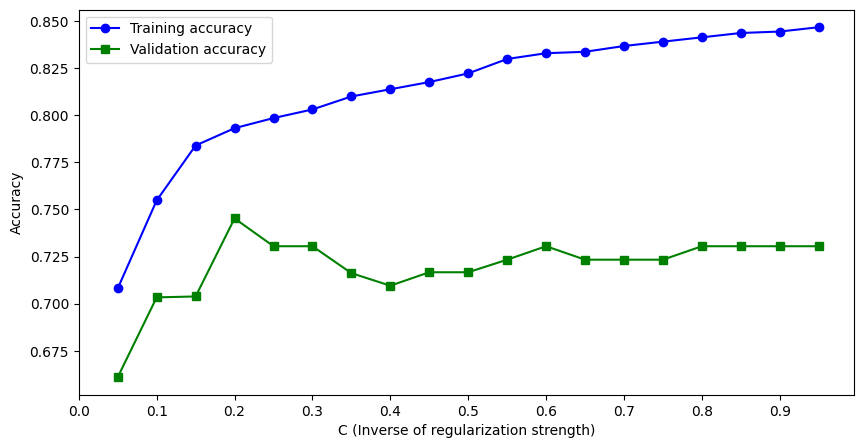

In [6]:
# Calculate the mean across the folds for the training accuracy and validation accuracy
train_means = np.mean(train_scores,axis=1)
val_means = np.mean(val_scores,axis=1)

# Plot the mean training accuracy and validation accuracy
plt.figure(figsize=(10,5))
plt.plot(C_range,train_means,color='blue',marker='o',label='Training accuracy')
plt.plot(C_range,val_means,color='green',marker='s',label='Validation accuracy')
plt.legend()
plt.xticks(ticks=np.arange(0,1,0.1))
plt.xlabel('C (Inverse of regularization strength)')
plt.ylabel('Accuracy')
plt.show()

As we can see above, there appears to be an optimal value of C around 0.2.  Above this, the training accuracy and validation accuracy diverge - training accuracy continues to improve as the model becomes more complex, but the validation accuracy remains flat or decreases slightly.  This is a good indication that the more complex models are overfitting the data.